In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import joblib
from collections import Counter
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
beer_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/final_beerdata_binary.gz", compression="gzip")

In [3]:
beer_csv.columns[(beer_csv == 0).all()]

Index(['corn-like', 'Malty'], dtype='object')

In [4]:
kmean_df = beer_csv[['beer_abv',
 'numberof_reviews',
  'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste', 
 'beer_style_ale',
 'beer_style_barleywine',
 'beer_style_bitter',
 'beer_style_exotic',
 'beer_style_ipa',
 'beer_style_kölsch',
 'beer_style_lager',
 'beer_style_pilsener',
 'beer_style_porter',
 'beer_style_stout',
 'beer_style_trappist',
 'beer_strength_Full',
 'beer_strength_Heavy',
 'beer_strength_Light',
 'beer_strength_Mid',
 'beer_strength_Very Strong',
 ]]

#'beer_abv',
# 'numberof_reviews',

 'grainy',
 'sweet',
 'hay',
 'straw',
 'cracker',
 'bicuity',
 'caramel',
 'toast',
 'roast',
 'coffee',
 'espresso',
 'burnt',
 'alcohol',
 'tobacco',
 'gunpowder',
 'leather',
 'pine',
 'grass',
 'raisins',
 'currant',
 'plum',
 'dates',
 'prunes',
 'figs',
 'blackberry',
 'blueberry',
 'banana',
 'pineapple',
 'apricot',
 'pear',
 'apple',
 'nectarine',
 'peach',
 'mango',
 'lemon',
 'lime',
 'orange',
 'tangerine',
 'clementine',
 'grapefruit',
 'zest',
 'metallic',
 'vinegar',
 'copper',
 'cidery',
 'astringent',
 'chlorine',
 'phenolic',
 'pepper',
 'clove',
 'anise',
 'licorice',
 'bacon',
 'fatty',
 'nutty',
 'butterscotch',
 'vanilla',
 'earthy',
 'woody',
 'bread',
 'saddle',
 'musty',
 'barnyard',
 'honey',
 'chestnut',
 'black',
 'garnet',
 'ruby',
 'brilliant',
 'hazy',
 'cloudy',
 'turbid',
 'opaque',
 'clear',
 'crystal',
 'bright',
 'dull',
 'persistent',
 'rocky',
 'large',
 'fluffy',
 'dissipating',
 'lingering',
 'white',
 'tan',
 'frothy',
 'delicate',
 'roasted',
 'bready',
 'bitter',
 'spicy',
 'fruity',
 'chocolate',
 'toffee',
 'tart',
 'subtle',
 'woodsy',
 'sulfuric',
 'assertive',
 'mild',
 'bold',
 'balanced',
 'robust',
 'intense',
 'harsh',
 'complex',
 'refined',
 'hearty',
 'smooth',
 'silky',
 'velvety',
 'prickly',
 'tingly',
 'creamy',
 'warming',
 'viscous',
 'oily',
 'Malty',
 'biscuity',
 'breadlike',
 'rich',
 'deep',
 'roasty',
 'cereal',
 'cookie',
 'coffeeish',
 'caramelly',
 'molasses',
 'complexity',
 'smoky',
 'autumnal',
 'cream',
 'milk',
 'oatmeal',
 'rustic',
 'layered',
 'piney',
 'citrusy',
 'grapefruity',
 'sharp',
 'fresh',
 'herbal',
 'zippy',
 'lemony',
 'aromatic',
 'floral',
 'springlike',
 'sprucelike',
 'juniper',
 'minty',
 'pungent',
 'elegant',
 'grassy',
 'baked',
 'bubblegum',
 'yeasty',
 'belgian',
 'tropical',
 'clean',
 'soft',
 'effervescent',
 'spritzy',
 'sparkling',
 'pinpoint',
 'bubbly',
 'gentle',
 'carbonation',
 'full',
 'light',
 'slick',
 'heavy',
 'dry',
 'thick',
 'thin',
'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Belgium',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Cayman Islands',
 'country_China',
 'country_Colombia',
 'country_Costa Rica',
 'country_Czechia',
 'country_Denmark',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Funatsu',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Hong Kong',
 'country_India',
 'country_Indian Ocean',
 'country_Indonesia',
 'country_Ireland',
 'country_Israel',
 'country_Italy',
 'country_Jammu and Kashmir',
 'country_Japan',
 'country_Kenya',
 'country_Latvia',
 'country_Lebanon',
 'country_Liechtenstein',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Madagascar',
 'country_Maihama',
 'country_Malaysia',
 'country_Mexico',
 'country_Monaco',
 'country_Myanmar',
 'country_Netherlands',
 'country_New Zealand',
 'country_Nigeria',
 'country_North Macedonia',
 'country_Norway',
 'country_Palestine',
 'country_Poland',
 'country_Portugal',
 'country_Puerto Rico',
 'country_Romania',
 'country_Russia',
 'country_Singapore',
 'country_Slovakia',
 'country_South Africa',
 'country_Spain',
 'country_Sri Lanka',
 'country_St Lucia',
 'country_Suriname',
 'country_Sweden',
 'country_Switzerland',
 'country_Tagus',
 'country_Tanzania',
 'country_The Bahamas',
 'country_Trinidad and Tobago',
 'country_Turks and Caicos Islands',
 'country_UK',
 'country_USA',
 'country_USVI',
 'country_Ukraine',
 'country_United States'

In [5]:
mapper = DataFrameMapper([(kmean_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(kmean_df.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=kmean_df.index, columns=kmean_df.columns)

In [6]:
scaled_features_df

,beer_abv,numberof_reviews,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style_ale,beer_style_barleywine,beer_style_bitter,...,beer_style_lager,beer_style_pilsener,beer_style_porter,beer_style_stout,beer_style_trappist,beer_strength_Full,beer_strength_Heavy,beer_strength_Light,beer_strength_Mid,beer_strength_Very Strong
0,-1.050016,5.607849,0.016562,-0.807798,-0.434135,-0.294680,-0.343785,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
1,-0.736313,-0.123179,-0.230248,-1.284871,-0.998675,-1.223821,-0.900071,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
2,-1.206867,-0.307746,0.316912,-1.066049,-1.857468,-0.518543,-1.217988,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
3,-1.520570,-0.321943,-0.996271,-1.747588,-2.851290,-2.320919,-1.887405,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,-1.064107,-0.735980,-0.022994,6.842477,-0.326213
4,-0.893165,-0.321943,-0.996271,-0.646641,0.192291,-0.743840,-0.806040,-0.761768,-0.150138,-0.193697,...,-0.197649,5.375935,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,0.884485,-0.331408,-0.230248,-0.646641,-1.112101,-1.532380,1.356691,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,-1.064107,1.358732,-0.022994,-0.146146,-0.326213
13242,-0.213475,-0.331408,2.067822,2.289217,1.496683,0.833238,1.356691,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
13243,-0.474894,-0.331408,-0.996271,-1.380605,-1.112101,-0.743840,-0.806040,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,0.939755,-0.735980,-0.022994,-0.146146,-0.326213
13244,0.204795,-0.331408,-0.230248,0.087324,-1.112101,0.044699,0.635781,1.312735,-0.150138,-0.193697,...,-0.197649,-0.186014,-0.226981,-0.326071,-0.183611,-1.064107,1.358732,-0.022994,-0.146146,-0.326213


In [7]:
dataset = kmean_df
dataset

,beer_abv,numberof_reviews,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_style_ale,beer_style_barleywine,beer_style_bitter,...,beer_style_lager,beer_style_pilsener,beer_style_porter,beer_style_stout,beer_style_trappist,beer_strength_Full,beer_strength_Heavy,beer_strength_Light,beer_strength_Mid,beer_strength_Very Strong
0,4.4,1257,3.830549,3.445107,3.694909,3.642403,3.660302,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,5.0,46,3.750000,3.282609,3.532609,3.347826,3.467391,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,4.1,7,3.928571,3.357143,3.285714,3.571429,3.357143,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3.5,4,3.500000,3.125000,3.000000,3.000000,3.125000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4.7,4,3.500000,3.500000,3.875000,3.500000,3.500000,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,8.1,2,3.750000,3.500000,3.500000,3.250000,4.250000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
13242,6.0,2,4.500000,4.500000,4.250000,4.000000,4.250000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13243,5.5,2,3.500000,3.250000,3.500000,3.500000,3.500000,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13244,6.8,2,3.750000,3.750000,3.500000,3.750000,4.000000,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
dataset = dataset.to_numpy()

In [9]:
dataset_train, dataset_test = train_test_split(dataset, random_state=36)

In [10]:
kmeans = KMeans(n_clusters=22, init='k-means++', n_init=100,max_iter=300, n_jobs=17,algorithm='auto', verbose=2)

In [11]:
model = kmeans.fit(dataset)

/opt/anaconda3/envs/PythonAdvanced/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Initialization complete
Iteration 0, inertia 2459722.5112184733
Iteration 1, inertia 2036300.342672082
Iteration 2, inertia 1977545.802524148
Iteration 3, inertia 1945602.8239504292
Iteration 4, inertia 1922457.9318574304
Iteration 5, inertia 1906875.933010872
Iteration 6, inertia 1895780.8617030508
Iteration 7, inertia 1887096.505714807
Iteration 8, inertia 1880974.3188534605
Iteration 9, inertia 1874871.4471024484
Iteration 10, inertia 1870341.9819566712
Iteration 11, inertia 1865745.760758961
Iteration 12, inertia 1859548.4753432083
Iteration 13, inertia 1853948.9857399494
Iteration 14, inertia 1850348.2327724923
Iteration 15, inertia 1849116.5730580443
Iteration 16, inertia 1847398.3909384082
Iteration 17, inertia 1843951.2263064664
Iteration 18, inertia 1841535.937139942
Iteration 19, inertia 1839406.1177698006
Iteration 20, inertia 1834669.8412686964
Iteration 21, inertia 1829227.3328086804
Iteration 22, inertia 1823656.368135538
Iteration 23, inertia 1821792.5821248384
Iteration

Iteration 5, inertia 2039037.166768988
Iteration 6, inertia 2022558.5219020727
Iteration 7, inertia 2006429.029476401
Iteration 8, inertia 1994322.241398008
Iteration 9, inertia 1982750.6555030895
Iteration 10, inertia 1971223.1404659445
Iteration 11, inertia 1962919.9106410104
Iteration 12, inertia 1957714.1181842457
Iteration 13, inertia 1952191.6803613098
Iteration 14, inertia 1945701.6272930885
Iteration 15, inertia 1940158.081941367
Iteration 16, inertia 1936585.708075251
Iteration 17, inertia 1931163.414097066
Iteration 18, inertia 1923970.994811539
Iteration 19, inertia 1916382.1180139005
Iteration 20, inertia 1912430.4234237692
Iteration 21, inertia 1905717.6356006474
Iteration 22, inertia 1899188.2371134167
Iteration 23, inertia 1894985.181394299
Iteration 24, inertia 1886622.320378696
Iteration 25, inertia 1882455.1193392628
Iteration 26, inertia 1878535.8332850416
Iteration 27, inertia 1875253.1848280677
Iteration 28, inertia 1870556.1857144334
Iteration 29, inertia 1867160.

Iteration 14, inertia 1797045.702148831
Iteration 15, inertia 1796242.4895604032
Iteration 16, inertia 1795670.767698202
Iteration 17, inertia 1794939.0815190114
Iteration 18, inertia 1794453.3536800274
Iteration 19, inertia 1794285.3287919061
Iteration 20, inertia 1794160.9848203955
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 2232416.0924847205
Iteration 1, inertia 1866688.6370274215
Iteration 2, inertia 1796795.0162720613
Iteration 3, inertia 1769811.2600832419
Iteration 4, inertia 1748536.7281107889
Iteration 5, inertia 1739873.6635855546
Iteration 6, inertia 1733579.171739018
Iteration 7, inertia 1732921.9020319907
Iteration 8, inertia 1731713.5882368041
Iteration 9, inertia 1731177.6710148144
Iteration 10, inertia 1729997.2797919733
Iteration 11, inertia 1727911.400376691
Converged at iteration 11: center shift 0.00039675316969711786 within tolerance 0.19415540416480753.
Initialization complete
Iteration 0, inertia 2246621.1849159086

Initialization complete
Iteration 0, inertia 2275338.9138737856
Iteration 1, inertia 1845948.86214066
Iteration 2, inertia 1796402.456920388
Iteration 3, inertia 1781690.148311183
Iteration 4, inertia 1775567.5110731153
Iteration 5, inertia 1772734.5609331052
Iteration 6, inertia 1771188.7609309468
Iteration 7, inertia 1770594.8470722714
Iteration 8, inertia 1770074.6391391584
Iteration 9, inertia 1769154.3682743025
Iteration 10, inertia 1767579.4538531487
Iteration 11, inertia 1766557.7090974464
Iteration 12, inertia 1765614.6491399738
Converged at iteration 12: center shift 0.10886457884872781 within tolerance 0.19415540416480753.
Initialization complete
Iteration 0, inertia 2340411.75077245
Iteration 1, inertia 1981994.975770405
Iteration 2, inertia 1924069.033242687
Iteration 3, inertia 1911304.7726426425
Iteration 4, inertia 1895954.4541742601
Iteration 5, inertia 1886108.3611934353
Iteration 6, inertia 1882514.941252305
Converged at iteration 6: center shift 0.15522284984209334 w

Iteration 8, inertia 1810435.5126016475
Iteration 9, inertia 1806601.906682242
Iteration 10, inertia 1805029.3134405727
Iteration 11, inertia 1800663.1441082365
Iteration 12, inertia 1797438.925446422
Iteration 13, inertia 1794180.8658973884
Iteration 14, inertia 1792463.604663464
Iteration 15, inertia 1789569.5797541558
Iteration 16, inertia 1788624.5075821707
Iteration 17, inertia 1787689.4586509513
Iteration 18, inertia 1787457.1801974408
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 2490165.570812566
Iteration 1, inertia 2050581.5873027653
Iteration 2, inertia 1986569.6157904535
Iteration 3, inertia 1956647.2126104813
Iteration 4, inertia 1939043.7371364161
Iteration 5, inertia 1925121.981263699
Iteration 6, inertia 1909226.6919527734
Iteration 7, inertia 1898964.6654390963
Iteration 8, inertia 1891296.5595637183
Iteration 9, inertia 1886422.8214615749
Iteration 10, inertia 1883368.333038222
Iteration 11, inertia 1882768.9017003563
Conv

Iteration 0, inertia 2674366.7562575364
Iteration 1, inertia 2123378.4247803013
Iteration 2, inertia 2076224.7375637693
Iteration 3, inertia 2050811.795863327
Iteration 4, inertia 2028116.2960429399
Iteration 5, inertia 1991021.8090508634
Iteration 6, inertia 1937020.5129016931
Iteration 7, inertia 1872980.6143570954
Iteration 8, inertia 1811538.2752539557
Iteration 9, inertia 1784675.7816779327
Iteration 10, inertia 1769911.3111642238
Iteration 11, inertia 1768712.3832422758
Iteration 12, inertia 1767715.160732018
Iteration 13, inertia 1764680.6506400234
Iteration 14, inertia 1758515.171149488
Iteration 15, inertia 1751592.930260905
Iteration 16, inertia 1750182.2772668202
Iteration 17, inertia 1749884.2091780687
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 2354149.018638122
Iteration 1, inertia 1940454.0092563734
Iteration 2, inertia 1874746.8481227397
Iteration 3, inertia 1852339.9131027823
Iteration 4, inertia 1844094.0892051733
Iterat

Iteration 0, inertia 2236850.068926391
Iteration 1, inertia 1929501.3280626317
Iteration 2, inertia 1889433.517290883
Iteration 3, inertia 1874040.4759927143
Iteration 4, inertia 1864427.7479544391
Iteration 5, inertia 1859752.1679617602
Iteration 6, inertia 1858141.7973537615
Iteration 7, inertia 1857706.7486026308
Iteration 8, inertia 1857343.8102069588
Converged at iteration 8: center shift 0.11524403192772015 within tolerance 0.19415540416480753.
Initialization complete
Iteration 0, inertia 2319275.2095382293
Iteration 1, inertia 2015716.7535661303
Iteration 2, inertia 1964069.0578176645
Iteration 3, inertia 1933421.5927509475
Iteration 4, inertia 1924569.2335889325
Iteration 5, inertia 1923201.2808333195
Iteration 6, inertia 1918848.0815357354
Iteration 7, inertia 1916920.5560783488
Iteration 8, inertia 1915206.2927141539
Iteration 9, inertia 1914655.4659142008
Iteration 10, inertia 1914342.9110349126
Iteration 11, inertia 1914031.2443307736
Iteration 12, inertia 1913908.480203633

Iteration 15, inertia 1795009.7072917535
Iteration 16, inertia 1794624.0318257797
Iteration 17, inertia 1794507.1064129996
Iteration 18, inertia 1794085.8115722698
Iteration 19, inertia 1793388.355915079
Iteration 20, inertia 1793262.0961212926
Iteration 21, inertia 1792921.2881110196
Iteration 22, inertia 1792387.8033081891
Iteration 23, inertia 1791318.2293828276
Iteration 24, inertia 1790687.472301459
Iteration 25, inertia 1790198.0354943622
Iteration 26, inertia 1790051.7562127495
Iteration 27, inertia 1789952.4567333912
Iteration 28, inertia 1789727.0436737093
Converged at iteration 28: strict convergence.
Initialization complete
Iteration 0, inertia 2454161.3690593843
Iteration 1, inertia 2035792.465400778
Iteration 2, inertia 1955887.8828429205
Iteration 3, inertia 1895939.180940105
Iteration 4, inertia 1858752.9937575655
Iteration 5, inertia 1828890.675328951
Iteration 6, inertia 1803534.7075757908
Iteration 7, inertia 1785554.2332331748
Iteration 8, inertia 1774915.6606846955


In [12]:
beer_cluster = model.predict(dataset)

In [13]:
silhouette_score(dataset, beer_cluster, metric='euclidean')

0.6052480902138738

In [14]:
Counter(kmeans.labels_)

Counter({5: 33,
         10: 993,
         9: 7750,
         12: 126,
         21: 59,
         15: 81,
         3: 194,
         17: 267,
         18: 214,
         1: 59,
         8: 50,
         13: 141,
         6: 398,
         0: 2132,
         19: 584,
         7: 81,
         2: 17,
         4: 14,
         20: 30,
         11: 13,
         16: 7,
         14: 3})

In [15]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
N = range(15,30) 
  
for n in N: 
    
    kmeanModel = KMeans(n_clusters=n).fit(dataset) 
    kmeanModel.fit(dataset)     
      
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[n] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / dataset.shape[0] 
    mapping2[n] = kmeanModel.inertia_ 

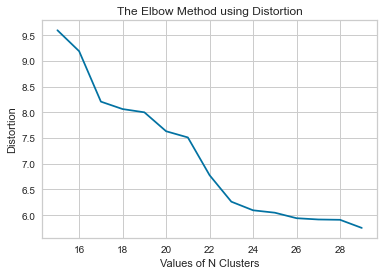

In [16]:
plt.plot(N, distortions, 'bx-') 
plt.xlabel('Values of N Clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

/opt/anaconda3/envs/PythonAdvanced/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<AxesSubplot:>, model=None)

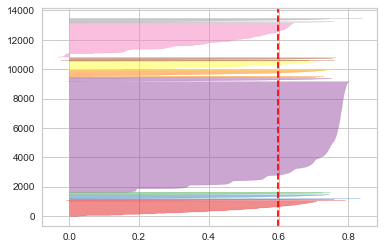

In [17]:
sv = SilhouetteVisualizer(KMeans(22))
sv.fit(dataset)


In [18]:
#viz_set = dataset
#fig, ax = plt.subplots(2, 2, figsize=(15,8))
#for i in [15, 18, 20, 25]:

#    Create KMeans instance for different number of clusters

#    km = KMeans(n_clusters=i, init='k-means++', n_init=100, max_iter=300, random_state=42)

#    Create SilhouetteVisualizer instance with KMeans instance
#    Fit the visualizer
 
#    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
#    visualizer.fit(viz_set)

In [19]:
filename = '/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/kmean_model.sav'
joblib.dump(model, filename)

['/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/kmean_model.sav']

In [20]:
beer_raw_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/data/final_beerdata.csv")

In [21]:
beer_raw_csv["Kmeans Cluster"] = beer_cluster

In [22]:
beer_raw_csv.groupby

<bound method DataFrame.groupby of        brewery_id                brewery_name  beer_id  \
0               1    Plzensky Prazdroj, a. s.      429   
1               1    Plzensky Prazdroj, a. s.     5916   
2               1    Plzensky Prazdroj, a. s.    19123   
3               1    Plzensky Prazdroj, a. s.    41294   
4               1    Plzensky Prazdroj, a. s.    49865   
...           ...                         ...      ...   
13241       27861             Unity Vibration    77099   
13242       27870         4 Hands Brewing Co.    76562   
13243       27879            Birdsong Brewing    76616   
13244       27912           Harvester Brewing    76911   
13245       27919  Fiddlehead Brewing Company    76970   

                               beer_name beer_style  beer_abv beer_strength  \
0                        Pilsner Urquell   pilsener       4.4          Full   
1                              Gambrinus   pilsener       5.0          Full   
2                         Gambr